In [73]:
#importing the standard python libraries for data exploration
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library
import matplotlib.pyplot as plt # data visualization library
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

In [74]:
#Reading in our dataset
train_df = pd.read_csv('train.csv') # reading in the training dataset.
test_df = pd.read_csv('test.csv')# reading in the test dataset.
combined = pd.concat([train_df,test_df], axis=0) #combining train and test dataset for data preprocessing
combined.shape

(2919, 81)

In [75]:
train_df.shape

(1460, 81)

In [76]:
test_df.shape

(1459, 80)

In [77]:
combined.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


In [79]:
#How many columns with different data types are there?
combined.get_dtype_counts()

float64    12
int64      26
object     43
dtype: int64

In [80]:
combined['SalePrice'].describe() # checking how Sales Price Variable is distributed

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

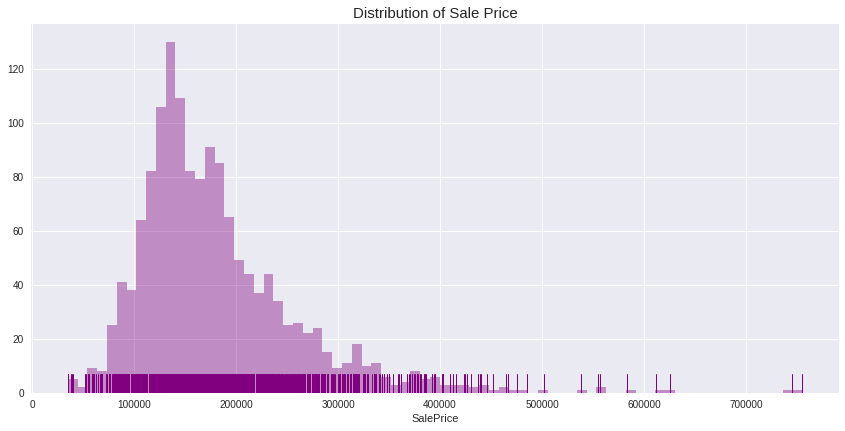

In [81]:
#plot the distribution plot of SalePrices of the houses
plt.figure(figsize=(12,6))
sns.distplot(combined['SalePrice'].dropna() ,kde= False,bins=75 , rug = True ,color='purple')
sns.set(font_scale = 1.25)
plt.tight_layout()
plt.title('Distribution of Sale Price')

In [85]:
sp_corr = combined.corr()["SalePrice"]
sp_corr_sort = sp_corr.sort_values(axis = 0 , ascending = False)
sp_corr_sort[sp_corr_sort > 0.50]

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

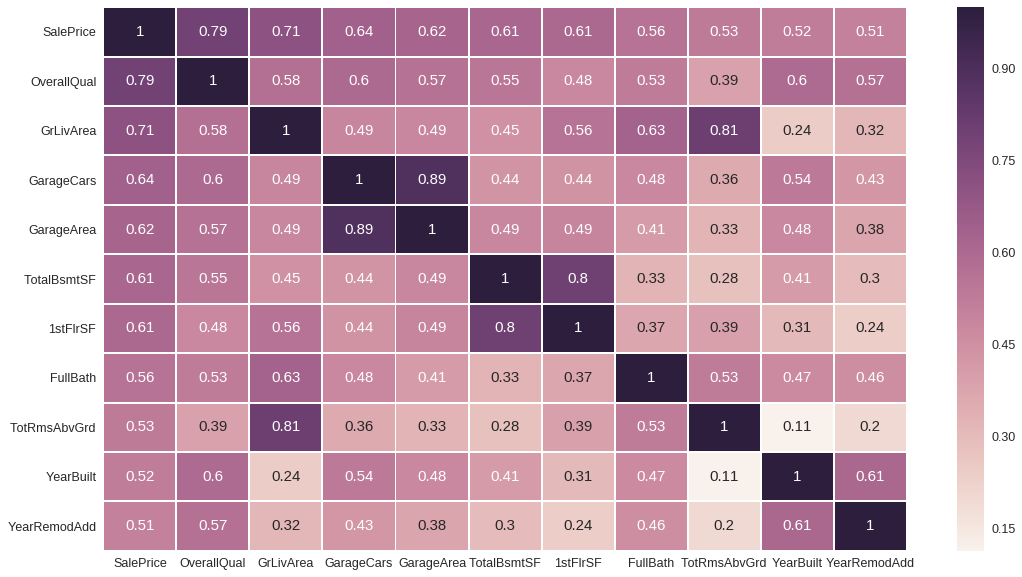

In [87]:
corr = combined[["SalePrice","OverallQual","GrLivArea","GarageCars",
                  "GarageArea","TotalBsmtSF","1stFlrSF","FullBath",
                  "TotRmsAbvGrd","YearBuilt","YearRemodAdd"]].corr()
plt.figure(figsize=(18,10))
sns.heatmap(corr, linecolor= "white" , lw =1,annot=True)

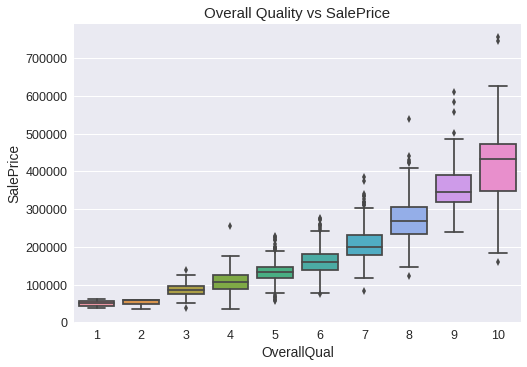

In [88]:
sns.boxplot(y="SalePrice", x="OverallQual", data=combined)
plt.title('Overall Quality vs SalePrice')

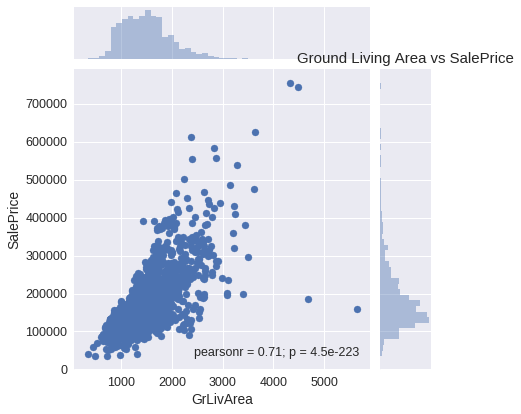

In [90]:
sns.jointplot(y="SalePrice", x="GrLivArea", data=combined)
plt.title('Ground Living Area vs SalePrice')

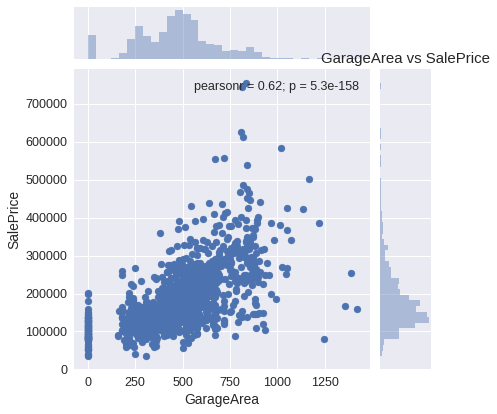

In [91]:
sns.jointplot(y="SalePrice", x="GarageArea", data=combined)
plt.title('GarageArea vs SalePrice')

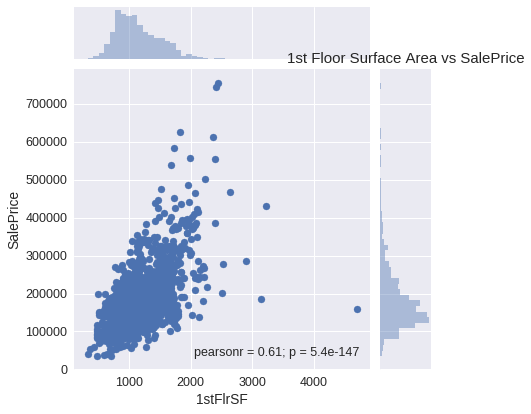

In [92]:
sns.jointplot(y="SalePrice", x="1stFlrSF", data=combined)
plt.title('1st Floor Surface Area vs SalePrice')

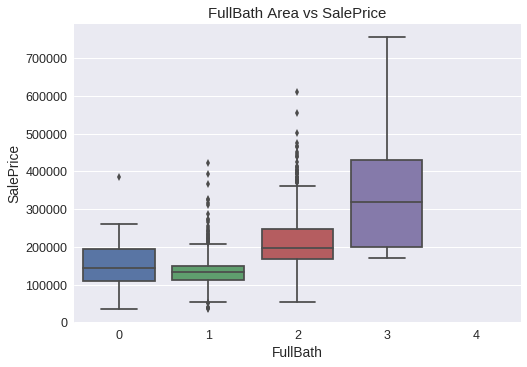

In [93]:
sns.boxplot(y="SalePrice", x="FullBath", data=combined)
plt.title('FullBath Area vs SalePrice')

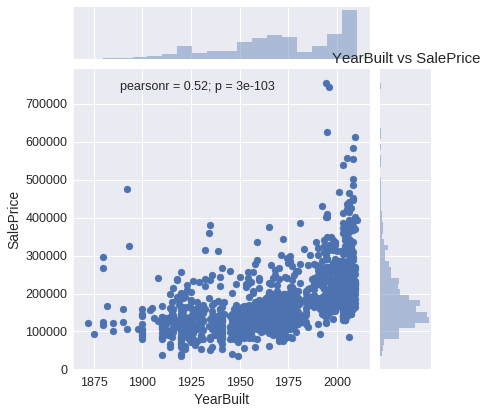

In [94]:
sns.jointplot(y="SalePrice", x="YearBuilt", data=combined)
plt.title('YearBuilt vs SalePrice')

In [95]:
#Categorical variables
combined.select_dtypes(include=['object']).columns

Index([u'Alley', u'BldgType', u'BsmtCond', u'BsmtExposure', u'BsmtFinType1',
       u'BsmtFinType2', u'BsmtQual', u'CentralAir', u'Condition1',
       u'Condition2', u'Electrical', u'ExterCond', u'ExterQual',
       u'Exterior1st', u'Exterior2nd', u'Fence', u'FireplaceQu', u'Foundation',
       u'Functional', u'GarageCond', u'GarageFinish', u'GarageQual',
       u'GarageType', u'Heating', u'HeatingQC', u'HouseStyle', u'KitchenQual',
       u'LandContour', u'LandSlope', u'LotConfig', u'LotShape', u'MSZoning',
       u'MasVnrType', u'MiscFeature', u'Neighborhood', u'PavedDrive',
       u'PoolQC', u'RoofMatl', u'RoofStyle', u'SaleCondition', u'SaleType',
       u'Street', u'Utilities'],
      dtype='object')

In [96]:
#Numerical Columns
combined.select_dtypes(include=['float64', 'int64']).columns

Index([u'1stFlrSF', u'2ndFlrSF', u'3SsnPorch', u'BedroomAbvGr', u'BsmtFinSF1',
       u'BsmtFinSF2', u'BsmtFullBath', u'BsmtHalfBath', u'BsmtUnfSF',
       u'EnclosedPorch', u'Fireplaces', u'FullBath', u'GarageArea',
       u'GarageCars', u'GarageYrBlt', u'GrLivArea', u'HalfBath', u'Id',
       u'KitchenAbvGr', u'LotArea', u'LotFrontage', u'LowQualFinSF',
       u'MSSubClass', u'MasVnrArea', u'MiscVal', u'MoSold', u'OpenPorchSF',
       u'OverallCond', u'OverallQual', u'PoolArea', u'SalePrice',
       u'ScreenPorch', u'TotRmsAbvGrd', u'TotalBsmtSF', u'WoodDeckSF',
       u'YearBuilt', u'YearRemodAdd', u'YrSold'],
      dtype='object')

In [97]:
from sklearn.preprocessing import Imputer

mean_imputer = Imputer(missing_values='NaN', strategy = 'mean', axis=0)
median_imputer = Imputer(missing_values='NaN', strategy = 'median', axis=0)
mode_imputer = Imputer(missing_values='NaN', strategy = 'most_frequent', axis=0)

In [98]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [99]:
#Missing values in the columns
combined[combined.columns[combined.isnull().any()]].isnull().sum()

Alley           2721
BsmtCond          82
BsmtExposure      82
BsmtFinSF1         1
BsmtFinSF2         1
BsmtFinType1      79
BsmtFinType2      80
BsmtFullBath       2
BsmtHalfBath       2
BsmtQual          81
BsmtUnfSF          1
Electrical         1
Exterior1st        1
Exterior2nd        1
Fence           2348
FireplaceQu     1420
Functional         2
GarageArea         1
GarageCars         1
GarageCond       159
GarageFinish     159
GarageQual       159
GarageType       157
GarageYrBlt      159
KitchenQual        1
LotFrontage      486
MSZoning           4
MasVnrArea        23
MasVnrType        24
MiscFeature     2814
PoolQC          2909
SalePrice       1459
SaleType           1
TotalBsmtSF        1
Utilities          2
dtype: int64

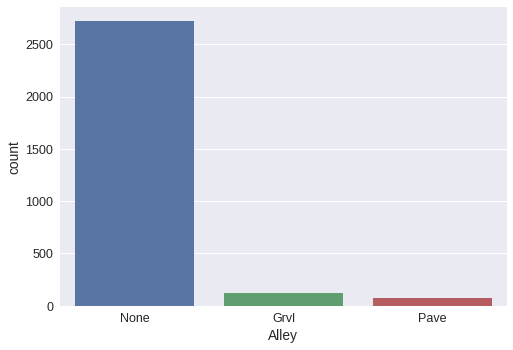

In [102]:
sns.countplot(x = 'Alley' , data = combined )

In [101]:
combined['Alley'].fillna('None',inplace = True)

In [103]:
combined[combined['BsmtCond'].isnull() == True][['BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2', 'BsmtQual','BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF','TotalBsmtSF']]

,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,TotalBsmtSF
17,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
39,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
90,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
102,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
156,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
182,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
259,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
342,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
362,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
371,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0


In [104]:
#Categorical features 'BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2', 'BsmtQual'

combined['BsmtQual'].fillna(value = 'None' , inplace = True)
combined['BsmtCond'].fillna(value = 'None' , inplace = True)
combined['BsmtExposure'].fillna(value = 'None' , inplace = True)
combined['BsmtFinType1'].fillna(value = 'None' , inplace = True)
combined['BsmtFinType2'].fillna(value = 'None' , inplace = True)

In [105]:
#Numerical Features 'BsmtCond','BsmtFinSF1','BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF','TotalBsmtSF'

combined['BsmtFinSF1'].fillna(value = 0 , inplace = True)
combined['BsmtFinSF2'].fillna(value = 0 , inplace = True)
combined['BsmtFullBath'].fillna(value = 0 , inplace = True)
combined['BsmtHalfBath'].fillna(value = 0 , inplace = True)
combined['BsmtUnfSF'].fillna(value = 0 , inplace = True)
combined['TotalBsmtSF'].fillna(value = 0 , inplace = True)

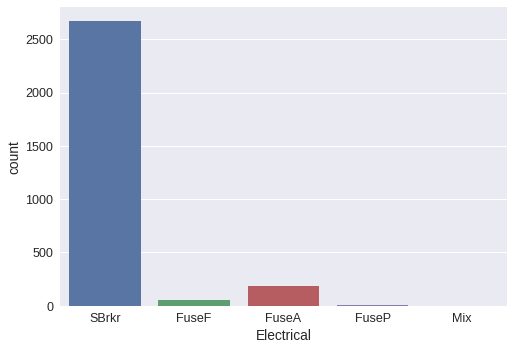

In [106]:
sns.countplot(x = 'Electrical' , data = combined)

In [107]:
combined['Electrical'].fillna(value = 'SBrkr' , inplace = True)

In [108]:
combined[combined['FireplaceQu'].isnull() == True][['Fireplaces','FireplaceQu']]

,Fireplaces,FireplaceQu
0,0,NaN
5,0,NaN
10,0,NaN
12,0,NaN
15,0,NaN
17,0,NaN
18,0,NaN
19,0,NaN
26,0,NaN
29,0,NaN


In [109]:
combined['FireplaceQu'].fillna(value = 'None' , inplace =  True)

In [110]:
combined[combined['GarageType'].isnull() == True][['GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond','GarageArea','GarageCars']]

,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,GarageArea,GarageCars
39,NaN,NaN,NaN,NaN,NaN,0.0,0.0
48,NaN,NaN,NaN,NaN,NaN,0.0,0.0
78,NaN,NaN,NaN,NaN,NaN,0.0,0.0
88,NaN,NaN,NaN,NaN,NaN,0.0,0.0
89,NaN,NaN,NaN,NaN,NaN,0.0,0.0
99,NaN,NaN,NaN,NaN,NaN,0.0,0.0
108,NaN,NaN,NaN,NaN,NaN,0.0,0.0
125,NaN,NaN,NaN,NaN,NaN,0.0,0.0
127,NaN,NaN,NaN,NaN,NaN,0.0,0.0
140,NaN,NaN,NaN,NaN,NaN,0.0,0.0


In [111]:
combined['GarageType'].fillna(value = 'None' , inplace = True)
combined['GarageYrBlt'].fillna(value = 'None' , inplace = True)
combined['GarageFinish'].fillna(value = 'None' , inplace = True)
combined['GarageQual'].fillna(value = 'None' , inplace = True)
combined['GarageCond'].fillna(value = 'None' , inplace = True)
combined['GarageArea'].fillna(value = 0 , inplace = True)
combined['GarageCars'].fillna(value = 0 , inplace = True)

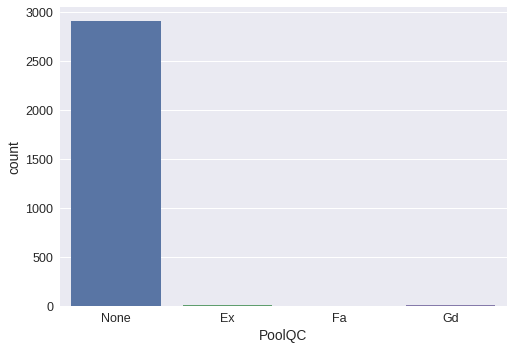

In [115]:
sns.countplot(x = 'PoolQC' , data = combined)

In [113]:
combined[combined['PoolQC'].isnull() == True][['PoolQC','PoolArea']]

,PoolQC,PoolArea
0,NaN,0
1,NaN,0
2,NaN,0
3,NaN,0
4,NaN,0
5,NaN,0
6,NaN,0
7,NaN,0
8,NaN,0
9,NaN,0


In [114]:
combined['PoolQC'].fillna(value = 'None' , inplace = True)

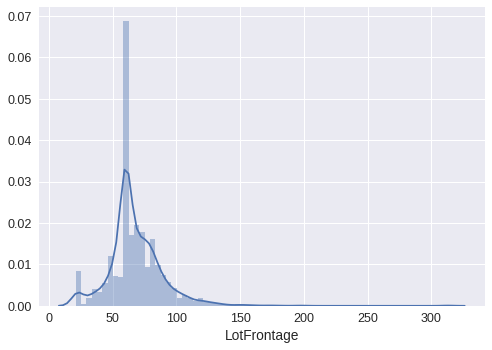

In [118]:
sns.distplot(combined['LotFrontage'].dropna() , bins =70)

In [117]:
combined['LotFrontage'] = combined['LotFrontage'].transform(lambda x: x.fillna(x.mode()[0]))

In [119]:
combined['MiscFeature'] = combined['MiscFeature'].fillna('None')
combined['Exterior1st'].fillna(value= 'None', inplace = True)
combined['Exterior2nd'].fillna(value= 'None', inplace = True)
combined['Functional'].fillna(value= 'None', inplace = True)
combined['KitchenQual'].fillna(value = 'None' , inplace = True)
combined['MSZoning'].fillna(value = 'None' , inplace = True)
combined['SaleType'].fillna(value = 'None' , inplace = True)
combined['Utilities'].fillna(value = 'None' , inplace = True)
combined["MasVnrType"] = combined["MasVnrType"].fillna('None')
combined["MasVnrArea"] = combined["MasVnrArea"].fillna(0)
combined["Fence"] = combined["Fence"].fillna('None')

In [120]:
combined[combined.columns[combined.isnull().any()]].isnull().sum()

SalePrice    1459
dtype: int64

In [121]:
#Skewed variables affect the performance of a Regression ML model so we do a Log transform to remove skewness
from scipy.stats import skew
#log transform the target:
combined["SalePrice"] = np.log1p(combined["SalePrice"])

#log transform skewed numeric features:
numeric_feats = combined.dtypes[combined.dtypes != "object"].index

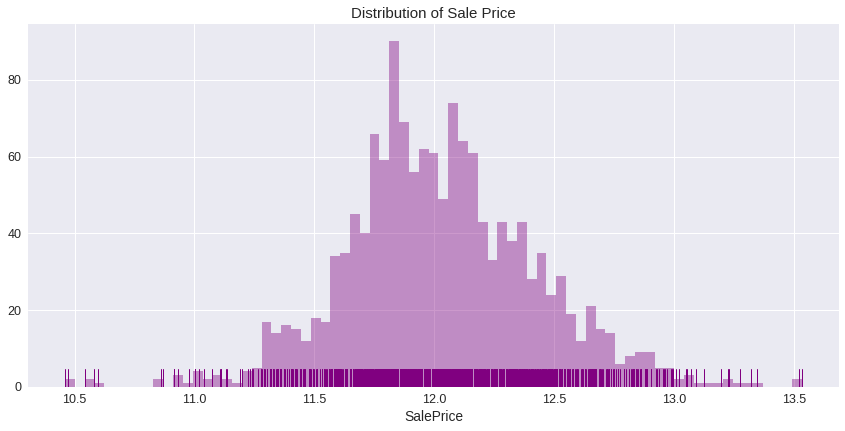

In [122]:
#plot the distribution plot of SalePrices of the houses
plt.figure(figsize=(12,6))
sns.distplot(combined['SalePrice'].dropna() ,kde= False,bins=75 , rug = True ,color='purple')
sns.set(font_scale = 1.25)
plt.tight_layout()
plt.title('Distribution of Sale Price')

In [125]:
skewed_feats = combined[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

combined[skewed_feats] = np.log1p(combined[skewed_feats])

In [126]:
combined.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,6.753438,6.751101,0.0,None,3,1Fam,TA,No,6.561031,0.0,...,WD,0.0,Pave,2.197225,6.753438,AllPub,0.000000,2003,2003,2008
1,7.141245,0.000000,0.0,None,3,1Fam,TA,Gd,6.886532,0.0,...,WD,0.0,Pave,1.945910,7.141245,AllPub,5.700444,1976,1976,2007
2,6.825460,6.765039,0.0,None,3,1Fam,TA,Mn,6.188264,0.0,...,WD,0.0,Pave,1.945910,6.825460,AllPub,0.000000,2001,2002,2008
3,6.869014,6.629363,0.0,None,3,1Fam,Gd,No,5.379897,0.0,...,WD,0.0,Pave,2.079442,6.629363,AllPub,0.000000,1915,1970,2006
4,7.044033,6.960348,0.0,None,4,1Fam,TA,Av,6.486161,0.0,...,WD,0.0,Pave,2.302585,7.044033,AllPub,5.262690,2000,2000,2008


In [127]:
categorical = combined.select_dtypes(exclude=['float64', 'int64'])

In [129]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

labelEnc=LabelEncoder()

cat_vars=['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd',
       'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC',
       'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig',
       'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood',
       'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition',
       'SaleType', 'Street', 'Utilities']

for col in cat_vars:
    combined[col]=labelEnc.fit_transform(combined[col])

In [130]:
combined.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,6.753438,6.751101,0.0,1,3,0,4,3,6.561031,0.0,...,9,0.0,1,2.197225,6.753438,0,0.000000,2003,2003,2008
1,7.141245,0.000000,0.0,1,3,0,4,1,6.886532,0.0,...,9,0.0,1,1.945910,7.141245,0,5.700444,1976,1976,2007
2,6.825460,6.765039,0.0,1,3,0,4,2,6.188264,0.0,...,9,0.0,1,1.945910,6.825460,0,0.000000,2001,2002,2008
3,6.869014,6.629363,0.0,1,3,0,1,3,5.379897,0.0,...,9,0.0,1,2.079442,6.629363,0,0.000000,1915,1970,2006
4,7.044033,6.960348,0.0,1,4,0,4,0,6.486161,0.0,...,9,0.0,1,2.302585,7.044033,0,5.262690,2000,2000,2008


In [131]:
combined['GarageYrBlt'].replace('None' , 100, inplace = True)

In [132]:
bins = [10,1960, 1980, 2000, 2017]
group_names = ['VeryOld', 'Old', 'Okay', 'New'] #Grouping into categories
combined['GarageYrBlt'] = pd.cut((combined['GarageYrBlt']), bins, labels=group_names)
combined['GarageYrBlt'].fillna('VeryOld', inplace = True)
combined['YearBuilt'] = pd.cut((combined['YearBuilt']), bins, labels=group_names)
combined['YearRemodAdd'] = pd.cut((combined['YearRemodAdd']), bins, labels=group_names)
combined['YrSold'] = pd.cut((combined['YrSold']), bins, labels=group_names)

In [133]:
from sklearn.preprocessing import LabelEncoder

labelEnc=LabelEncoder()

cat_vars=['GarageYrBlt','YearBuilt','YearRemodAdd', 'YrSold']

for col in cat_vars:
    combined[col]=labelEnc.fit_transform(combined[col])

In [134]:
combined.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,6.753438,6.751101,0.0,1,3,0,4,3,6.561031,0.0,...,9,0.0,1,2.197225,6.753438,0,0.000000,0,0,0
1,7.141245,0.000000,0.0,1,3,0,4,1,6.886532,0.0,...,9,0.0,1,1.945910,7.141245,0,5.700444,2,2,0
2,6.825460,6.765039,0.0,1,3,0,4,2,6.188264,0.0,...,9,0.0,1,1.945910,6.825460,0,0.000000,0,0,0
3,6.869014,6.629363,0.0,1,3,0,1,3,5.379897,0.0,...,9,0.0,1,2.079442,6.629363,0,0.000000,3,2,0
4,7.044033,6.960348,0.0,1,4,0,4,0,6.486161,0.0,...,9,0.0,1,2.302585,7.044033,0,5.262690,1,1,0


In [135]:
New_Train = combined[:1460]
X_train = New_Train.drop('SalePrice',axis=1)
y_train = New_Train['SalePrice']

In [136]:
New_Train.shape

(1460, 81)

In [137]:
New_Test = combined[1460:]
X_test = New_Test.drop('SalePrice',axis=1)

In [138]:
X_test.shape

(1459, 80)

In [139]:
New_Train.to_csv('train.processed.csv')
X_test.to_csv('test.processed.csv')

In [140]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

In [143]:
#Defining a function to calculate the RMSE for each Cross validated fold
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=5))
    return (rmse)

In [142]:
model_ridge = Ridge(alpha = 5).fit(X_train, y_train)

In [146]:
alphas = [0.0001,0.1,0.5,1,2,5,7,10]
rmse_cv_ridge = [rmse_cv(Ridge(alpha = alpha).fit(X_train, y_train)).mean() for alpha in alphas]
print(rmse_cv_ridge)

[0.13768731105207208, 0.13752575689957064, 0.13715851248297664, 0.13694824072331638, 0.13680222167897049, 0.1368620294368553, 0.13697402870523151, 0.13715470730349338]


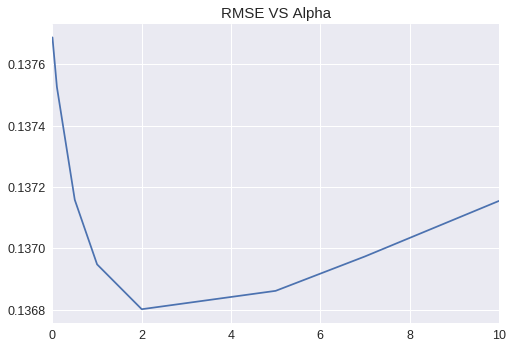

In [147]:
rmse_cv_ridge = pd.Series(rmse_cv_ridge, index = alphas)
rmse_cv_ridge.plot(title = "RMSE VS Alpha")

In [148]:
model_ridge = Ridge(alpha = 2).fit(X_train, y_train)

In [149]:
rmse_cv(model_ridge).mean()

0.13680222167897049

In [150]:
ridge_preds = np.exp(model_ridge.predict(X_test))

In [151]:
ridge_preds

array([ 120765.87566033,  159930.41836795,  176819.78900378, ...,
        155974.23140395,  118113.32289464,  233832.75602679])

In [152]:
from sklearn.linear_model import Lasso
model_lasso = Lasso().fit(X_train, y_train)

In [153]:
alphas = [0.00001,.0001,0.001,0.002,0.005,0.01]
rmse_cv_lasso = [rmse_cv(Lasso(alpha = alpha)).mean() for alpha in alphas]
print(rmse_cv_lasso)

[0.13734861978252247, 0.13668481751798417, 0.1366239343771197, 0.13739336153070783, 0.14201429249458045, 0.15121259989809815]


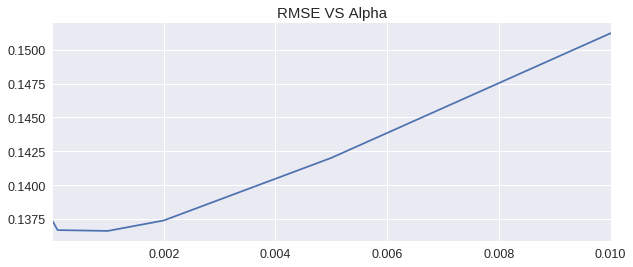

In [154]:
rmse_cv_lasso = pd.Series(rmse_cv_lasso, index = alphas)
plt.figure(figsize=(10,4))
rmse_cv_lasso.plot(title = "RMSE VS Alpha")

In [155]:
model_lasso = Lasso(alpha = 0.001 , max_iter=1000).fit(X_train, y_train)

In [156]:
rmse_cv(model_lasso).mean()

0.1366239343771197

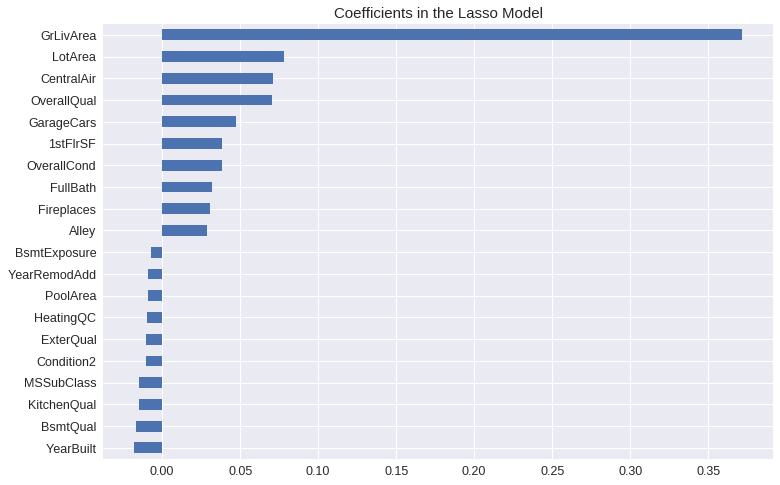

In [157]:
#checking the magnitude of coefficients, which coefficients are most important.

predictors = X_train.columns

coef = pd.Series(model_lasso.coef_, index = X_train.columns)

imp_coef = pd.concat([coef.sort_values().head(10),coef.sort_values().tail(10)])

plt.figure(figsize=(12,8))
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

In [158]:
lasso_preds = np.expm1(model_lasso.predict(X_test)) # reversing Log Transformation

In [159]:
lasso_preds

array([ 122880.19490118,  151874.36242762,  177938.33110921, ...,
        154127.33517724,  114107.76330612,  232756.55478394])

In [160]:
Final = 0.5*lasso_preds + 0.5*ridge_preds # combining the models

In [161]:
submission = pd.DataFrame({
        "Id": X_test["Id"],
        "SalePrice": Final
    })

In [162]:
submission.to_csv("HousePrice.csv", index=False)